In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv('E:/kaggle/houseprice/data/Mtrain.csv')

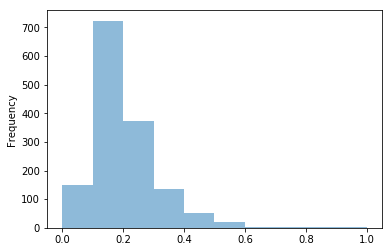

In [2]:
train['SalePrice'].plot.hist(alpha = 0.5)

In [4]:
#从上图中可以看到，结果的数据分布不均匀，在采样时，需要尽可能地均匀采样
#对此我们暂不做处理，在后期优化的时候进行数据合成或者上下采样
from sklearn import ensemble,tree,linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [3]:
test = pd.read_csv('E:/kaggle/houseprice/data/Mtest.csv')
del test['SalePrice']
test.shape,train.shape

((1459, 301), (1460, 302))

In [5]:
#定义几个函数
#显示评分
def get_score(prediction,lables):
    print('R2:{}'.format(r2_score(prediction,lables)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(prediction,lables))))
    
#显示交叉检验评分
def train_test(estimator,x_train,x_test,y_train,y_test):
    prediction_train = estimator.predict(x_train)
    print(estimator)
    get_score(prediction_train,y_train)
    prediction_test = estimator.predict(x_test)
    print('Test')
    get_score(prediction_test,y_test)
    

In [20]:
y_train = train['SalePrice']
y_train

0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
5       0.150118
6       0.377864
7       0.229274
8       0.131926
9       0.115401
10      0.131371
11      0.430635
12      0.151507
13      0.339675
14      0.169560
15      0.134842
16      0.158450
17      0.076517
18      0.172337
19      0.144563
20      0.403277
21      0.145119
22      0.270935
23      0.131926
24      0.165394
25      0.307457
26      0.138731
27      0.376475
28      0.239689
29      0.046660
          ...   
1430    0.218359
1431    0.151160
1432    0.041105
1433    0.210526
1434    0.173726
1435    0.193168
1436    0.118872
1437    0.499538
1438    0.159422
1439    0.225108
1440    0.216775
1441    0.158867
1442    0.382030
1443    0.119567
1444    0.200944
1445    0.130676
1446    0.170810
1447    0.284822
1448    0.107068
1449    0.079295
1450    0.140397
1451    0.350215
1452    0.152895
1453    0.068879
1454    0.208443
1455    0.194556
1456    0.243161
1457    0.3216

In [22]:
y_train = np.log(y_train)
import seaborn as sns
#ax = sns.distplot(y_train)
y_train

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
1430   NaN
1431   NaN
1432   NaN
1433   NaN
1434   NaN
1435   NaN
1436   NaN
1437   NaN
1438   NaN
1439   NaN
1440   NaN
1441   NaN
1442   NaN
1443   NaN
1444   NaN
1445   NaN
1446   NaN
1447   NaN
1448   NaN
1449   NaN
1450   NaN
1451   NaN
1452   NaN
1453   NaN
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
1459   NaN
Name: SalePrice, Length: 1460, dtype: float64